<a href="https://colab.research.google.com/github/nikhomgithub/tfSciPy2018/blob/master/sentdex_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [0]:
import matplotlib.pyplot as plt
import cv2 as cv2

In [0]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

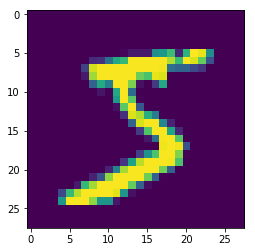

In [34]:
plt.imshow(x_train[0])

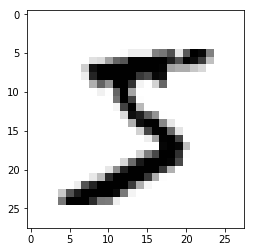

In [35]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [36]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

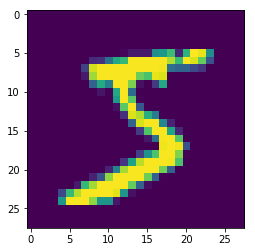

In [38]:
plt.imshow(x_train[0])

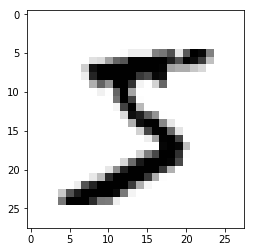

In [39]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [40]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #probably distribution
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #depend on pattern of input, output 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2288 - acc: 0.9307
Epoch 2/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0970 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0711 - acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0559 - acc: 0.9826
Epoch 5/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0471 - acc: 0.9852


In [44]:
val_loss, val_acc = model.evaluate(x_test, y_test)

print( 'Val loss:', val_loss, 'Val accuracy:', val_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0858 - acc: 0.9735
Val loss: 0.0858394727163366 Val accuracy: 0.9735


In [0]:
model.save('sendtex_mnist.model')

In [0]:
load_model=tf.keras.models.load_model('sendtex_mnist.model')

In [0]:
prediction=load_model.predict([x_test])

In [52]:
print(prediction)

[[3.8421630e-09 3.4732959e-06 1.7187611e-07 ... 9.9999368e-01
  1.8981365e-07 1.3094507e-06]
 [1.0452750e-08 2.8807899e-06 9.9996305e-01 ... 3.0256567e-06
  8.5484743e-08 3.8743616e-11]
 [6.2178480e-09 9.9993670e-01 1.8800914e-06 ... 3.5403278e-05
  9.5247460e-06 8.6707516e-08]
 ...
 [4.9219966e-14 2.0906023e-10 3.6971065e-11 ... 4.4228536e-09
  1.6944338e-09 4.3236609e-10]
 [1.0261823e-09 1.2825194e-08 7.2850510e-11 ... 3.5424554e-07
  7.5369667e-06 3.2016292e-11]
 [3.2976952e-12 2.5146244e-11 1.6844362e-12 ... 1.3315153e-16
  7.8488022e-10 4.7758585e-12]]


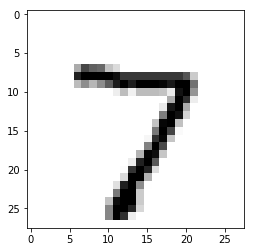

In [53]:
plt.imshow(x_test[0], cmap=plt.cm.binary)

In [55]:
import numpy as np
print(np.argmax(prediction[0]))

7


In [0]:
from google.colab import files
files.download('sendtex_mnist.model') 